# Mapa de atributos, 3 classes Iris, caso 2D

Desenvolva aqui o seu exercício de classificação supervisionada usando a base de dados Iris. O que queremos principalmente é a visualização das regiões do classificador no espaço de atributos. Você encontrará a figura que deve ser gerada nos dois notebooks: <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Logistica-matricial.ipynb">Regressao-Logistica-matricial.ipynb</a> e <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Logistica-Keras.ipynb">Regressao-Logistica-Keras.ipynb</a>. Aproveite para se familiarizar com as duas abordagens. 

Coloque outras coisas que você acha interessante como exercício didático.


## Entrega do exercício

Coloque o seu código aqui neste notebook como entrega do exercício. **Não altere o nome deste notebook**. 

Depois de rodar o notebook, salve a visualização gerada como *my_mapa_atributos.png*. Use o trecho do [código abaixo](#figura) para gerar a figura do **tamanho adequado** e com o **nome certo**, para permitir a correção automática. 

## Visualização do mapa de atributos

<a id='figura'></a>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
def oneHotIt(Y,n_classes):
    n_samples = Y.size # número de amostras
    i = np.arange(n_samples)
    Y_oh = np.zeros(shape=(n_samples,n_classes))
    Y_oh[i,Y] = 1
    return Y_oh

def softmax(Z):
    # computes softmax for all samples, normalize among classes (columns)
    # input Z: scores; shape: samples rows x classes columns
    # output S: same shape of input
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims=True) # normaliza nas classes - colunas
    return S

def predict(X,WT):
    Y_hat_oh = softmax(X.dot(WT))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(Y_hat_oh, axis=1)
    return Y_hat

In [3]:
# carrega os dados
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Y = iris.target

# normalização dos dados
X_c = X - X.min(axis=0,keepdims=True)
X_c /= X_c.max(axis=0,keepdims=True)

Y_oh = oneHotIt(Y,3)

X_bias = np.hstack([np.ones((150,1)),X_c])

n_samples = X_bias.shape[0] # number of training examples
n_features = X_bias.shape[1] # number of attributes (features + 1(bias))
n_classes = 3          # number of classes
WT = np.zeros((n_features,n_classes)) # n. de linhas é igual a número de atributos (features, pixels)
iterations = 10000
learningRate = 0.15

losses = []
for i in range(iterations):
    scores = X_bias.dot(WT)
    Y_hat_oh = softmax(scores)
    loss = (-1. / n_samples) * np.sum(Y_oh * np.log(Y_hat_oh))
    Grad = (-1. / n_samples) * (X_bias.T).dot(Y_oh - Y_hat_oh) 
    WT = WT - (learningRate * Grad)
    losses.append(loss)
    
Y_hat = predict(X_bias,WT)

In [4]:
def FSView(X_bias, Y, WT):
    
    # parâmetros da função
    # número de elementos
    all = 500
    # menor valor de X
    minX = X_bias[1].min()-0.1
    # menor valor de Y
    minY = X_bias[2].min()-0.1
    # maior valor de X
    maxX = X_bias[1].max()+0.1
    # maior valor de Y
    maxY = X_bias[2].max()+0.1
    
    # Cálculo da matriz bidimensional de atributos
    SL, PL = np.meshgrid(np.linspace(minX, maxX, all), 
                         np.linspace(minY, maxY, all))
    X_guessed = np.c_[SL.ravel(), PL.ravel()]
    
    # adição do bias
    X_bias_guessed = np.hstack([np.ones((X_guessed.shape[0],1)),X_guessed])
    
    # predição dos dados
    Y_hat = predict(X_bias_guessed,WT)
    
    # cria a figura do tamanho adequado para a correção automática
    fig = plt.figure(figsize=(8,5))
    
    # plota regiões de predição
    plt.pcolormesh(SL, PL, Y_hat.reshape(all,all), cmap=plt.cm.PuBu)
    
    # plota dados originais
    colors = np.array(['r','y','b'])
    plt.scatter(X_bias[:, 1], X_bias[:, 2], c=colors[Y])
    plt.title('Visualizacão do mapa de atributos')
    plt.xlabel('Comprimento sepalas')
    plt.ylabel('Comprimento petalas')
    plt.savefig('my_mapa_atributos.png')
    plt.show()

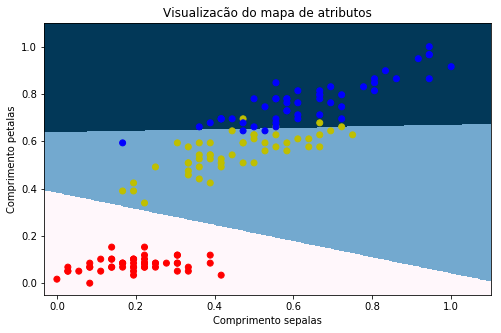

In [5]:
FSView(X_bias,Y,WT)